In [46]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
df_org = pd.read_csv('application_train.csv')

In [47]:
df=df_org.copy()

In [48]:
#Overview the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   Unnamed: 1                   0 non-null       float64
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [49]:
#Closer look 
df.head(10)

,SK_ID_CURR,Unnamed: 1,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
0,100002,NaN,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1
1,100003,NaN,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Core staff,2.0,0,0,0,0,0,0,School,0
2,100004,NaN,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Laborers,1.0,0,0,0,0,0,0,Government,0
3,100006,NaN,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
4,100007,NaN,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Core staff,1.0,0,0,0,0,1,1,Religion,0
5,100008,NaN,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Laborers,2.0,0,0,0,0,0,0,Other,0
6,100009,NaN,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,Accountants,3.0,0,0,0,0,0,0,Business Entity Type 3,0
7,100010,NaN,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,Managers,2.0,0,0,0,0,1,1,Other,0
8,100011,NaN,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,NaN,2.0,0,0,0,0,0,0,XNA,0
9,100012,NaN,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,Laborers,1.0,0,0,0,0,0,0,Electricity,0


In [50]:
#Closer look 
df.tail(10)

,SK_ID_CURR,Unnamed: 1,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
307501,456245,NaN,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,...,Low-skill Laborers,5.0,0,0,0,0,0,0,Industry: type 1,0
307502,456246,NaN,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,...,Laborers,3.0,0,0,0,0,1,1,School,0
307503,456247,NaN,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,...,Core staff,1.0,0,0,0,0,0,0,Bank,0
307504,456248,NaN,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,Sales staff,1.0,0,0,0,0,0,0,Self-employed,0
307505,456249,NaN,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,NaN,1.0,0,0,0,0,0,0,XNA,0
307506,456251,NaN,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Sales staff,1.0,0,0,0,0,0,0,Services,0
307507,456252,NaN,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,1.0,0,0,0,0,0,0,XNA,0
307508,456253,NaN,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,Managers,1.0,0,0,0,0,1,1,School,0
307509,456254,NaN,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Laborers,2.0,0,0,0,1,1,0,Business Entity Type 1,1
307510,456255,NaN,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Laborers,2.0,0,0,0,0,1,1,Business Entity Type 3,0


In [51]:
#Overview of missing values 
df.isna().sum()

SK_ID_CURR                          0
Unnamed: 1                     307511
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [52]:
#How many percentages does missing values in variables?

def percentmissing(df1):
    for col in df1.columns:
        percent=df1[col].isna().mean()*100
        if (percent !=0):
            print('{} = {}%'.format(col,round(percent,2)))
percentmissing(df_org)

Unnamed: 1 = 100.0%
AMT_ANNUITY = 0.0%
AMT_GOODS_PRICE = 0.09%
NAME_TYPE_SUITE = 0.42%
OWN_CAR_AGE = 65.99%
OCCUPATION_TYPE = 31.35%
CNT_FAM_MEMBERS = 0.0%


<AxesSubplot:>

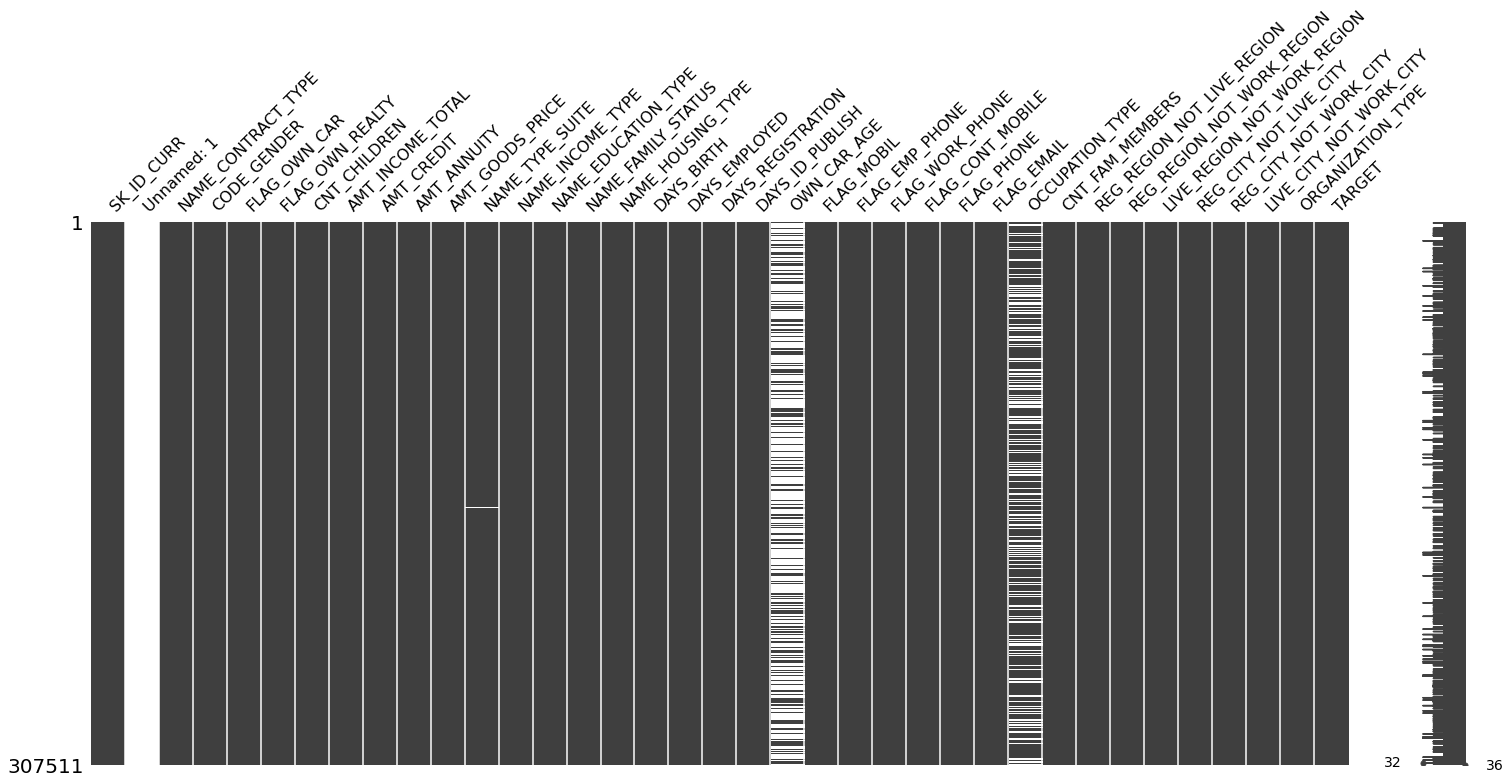

In [53]:
#Visualization of missing values
msno.matrix(df)

In [54]:
#Closer look for the categorical variables
df.describe(include = 'object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511
unique,2,3,2,2,7,8,5,6,6,18,58
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,Business Entity Type 3
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,67992


In [55]:
#Drop the unnecessary columns from the dataset 
df.drop(['Unnamed: 1'], axis=1, inplace=True)

In [56]:
df['OCCUPATION_TYPE'].describe()
df['OCCUPATION_TYPE'].unique()
pd.value_counts(df.OCCUPATION_TYPE)

#Even though majority is missing, still we can get a good insight using this variable. 
#That's why I decided to keep it. I'll create an nonconfirmed category for the missing variables. 

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [57]:
#Drop all the variables that have missing values higher than 50%
df = df.loc[:,df.isnull().sum()/len(df)<=0.50]

In [58]:
percentmissing(df)

AMT_ANNUITY = 0.0%
AMT_GOODS_PRICE = 0.09%
NAME_TYPE_SUITE = 0.42%
OCCUPATION_TYPE = 31.35%
CNT_FAM_MEMBERS = 0.0%


In [59]:
#Replacing missing values with Nonconfirmed category
df["OCCUPATION_TYPE"] = df["OCCUPATION_TYPE"].fillna("Nonconfirmed") 

In [60]:
#Yeayy
pd.value_counts(df.OCCUPATION_TYPE)

Nonconfirmed             96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [61]:
#Overview Gender variable
df['CODE_GENDER'].describe()
df['CODE_GENDER'].unique()
pd.value_counts(df.CODE_GENDER)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [62]:
#Replacing XNA with NAN
df.CODE_GENDER.replace('XNA', np.NaN, inplace = True)

In [63]:
#Imputing 4 missing value using the mode strategy
#because gender is a categorial variable
df.CODE_GENDER.fillna(df.CODE_GENDER.mode()[0], inplace = True)

In [64]:
#Mode imputation for type of suite variable
df.NAME_TYPE_SUITE.fillna(df.NAME_TYPE_SUITE.mode()[0], inplace = True)

In [65]:
#Imputing other categorical columns using the mode strategy
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [66]:
#Even though imputing AMT_ANNUITY and AMT_GOODS_PRICE by AMT_CREDIT is a better option,
#I imputed all the numerical columns with the median for simplicity
df.fillna(df.select_dtypes(include='number').median().iloc[0], inplace=True)

In [67]:
#Creating bind for AMT_INCOME_TOTAL
#in 1000s 
df['AMT_INCOME_TOTAL']=df['AMT_INCOME_TOTAL']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
ranges = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k',
          '700k-800k','800k-900k','900k-1M', '1M Above']
df['INCOME_BIN']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [68]:
#overview the income bins
round(df["INCOME_BIN"].value_counts(normalize = True)*100,2)

100K-200K    50.73
200k-300k    21.21
0-100K       20.73
300k-400k     4.78
400k-500k     1.74
500k-600k     0.36
600k-700k     0.28
800k-900k     0.10
700k-800k     0.05
900k-1M       0.01
1M Above      0.01
Name: INCOME_BIN, dtype: float64

In [69]:
#Creating bind for AMT_INCOME_TOTAL
#in 10000s 

df['AMT_CREDIT']=df['AMT_CREDIT']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
ranges = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L+']
df['CREDIT_BIN']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=ranges)

In [70]:
round(df["CREDIT_BIN"].value_counts(normalize = True)*100,2)

2L-3L     17.82
10L+      16.25
5L-6L     11.13
4L-5L     10.42
1L-2L      9.80
3L-4L      8.56
6L-7L      7.82
8L-9L      7.09
7L-8L      6.24
9L-10L     2.90
0-1L       1.95
Name: CREDIT_BIN, dtype: float64

In [71]:
#Correcting some negative year variables
df['AGE'] = round(abs(df.DAYS_BIRTH)/365,0)
df['EMPLOYMENT_YEARS'] = round(abs(df.DAYS_EMPLOYED)/365,0)
df['REGISTRATION_YEARS'] = round(abs(df.DAYS_REGISTRATION)/365,0)
df['PUBLISH_YEARS'] = round(abs(df.DAYS_ID_PUBLISH)/365,0)
df['PUBLISH_DAYS'] = round(abs(df.DAYS_ID_PUBLISH))

In [72]:
#Creating age category
df['Age_Bins']=df['AGE'].apply(lambda x : 'Senior' if x > 65 else ('Youth' if x < 27 else 'Adult'))

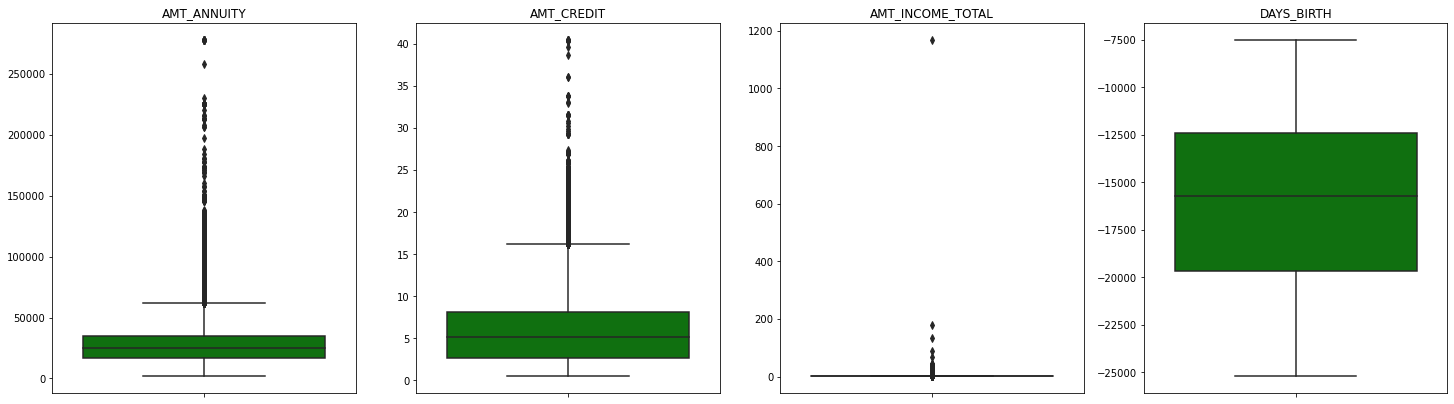

In [73]:
#Identifying outliers:

plt.figure(figsize=[25,15])
outliers_columns=['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','DAYS_BIRTH']

for i in enumerate(outliers_columns):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=df[i[1]],color="green")
    plt.title(i[1])
    plt.ylabel("")
    
#It seems like there are some extreme points in the dataset.  
#AMT_INCOME_TOTAL has a very big outlier 
#Only age does not have any outlier

In [74]:
#TREATING OUTLIERS (some of them)
#Another method:
#Find the middle of the range between quantile 1 and quantile 3
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

IQR=Q3-Q1
print(IQR)

SK_ID_CURR                     177997.0000
CNT_CHILDREN                        1.0000
AMT_INCOME_TOTAL                    0.9000
AMT_CREDIT                          5.3865
AMT_ANNUITY                     18072.0000
AMT_GOODS_PRICE                441000.0000
DAYS_BIRTH                       7269.0000
DAYS_EMPLOYED                    2471.0000
DAYS_REGISTRATION                5469.5000
DAYS_ID_PUBLISH                  2579.0000
FLAG_MOBIL                          0.0000
FLAG_EMP_PHONE                      0.0000
FLAG_WORK_PHONE                     0.0000
FLAG_CONT_MOBILE                    0.0000
FLAG_PHONE                          1.0000
FLAG_EMAIL                          0.0000
CNT_FAM_MEMBERS                     1.0000
REG_REGION_NOT_LIVE_REGION          0.0000
REG_REGION_NOT_WORK_REGION          0.0000
LIVE_REGION_NOT_WORK_REGION         0.0000
REG_CITY_NOT_LIVE_CITY              0.0000
REG_CITY_NOT_WORK_CITY              0.0000
LIVE_CITY_NOT_WORK_CITY             0.0000
TARGET     

In [75]:
#For AMT_CREDIT
IQRage= Q3['AMT_CREDIT']- Q1['AMT_CREDIT']
below=Q3['AMT_CREDIT']-1.5*IQRage
above=Q3['AMT_CREDIT']+1.5*IQRage

In [76]:
df.loc[(df['AMT_CREDIT']< below) | (df['AMT_CREDIT']<above)]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE,TARGET,INCOME_BIN,CREDIT_BIN,AGE,EMPLOYMENT_YEARS,REGISTRATION_YEARS,PUBLISH_YEARS,PUBLISH_DAYS,Age_Bins
0,100002,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,...,Business Entity Type 3,1,200k-300k,4L-5L,26.0,2.0,10.0,6.0,2120,Youth
1,100003,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,...,School,0,200k-300k,10L+,46.0,3.0,3.0,1.0,291,Adult
2,100004,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,135000.0,...,Government,0,0-100K,1L-2L,52.0,1.0,12.0,7.0,2531,Adult
3,100006,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,297000.0,...,Business Entity Type 3,0,100K-200K,3L-4L,52.0,8.0,27.0,7.0,2437,Adult
4,100007,Cash loans,M,N,Y,0,1.215,5.130000,21865.5,513000.0,...,Religion,0,100K-200K,5L-6L,55.0,8.0,12.0,9.0,3458,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,Cash loans,M,N,N,0,1.575,2.547000,27558.0,225000.0,...,Services,0,100K-200K,2L-3L,26.0,1.0,23.0,5.0,1982,Youth
307507,456252,Cash loans,F,N,Y,0,0.720,2.695500,12001.5,225000.0,...,XNA,0,0-100K,2L-3L,57.0,1001.0,12.0,11.0,4090,Adult
307508,456253,Cash loans,F,N,Y,0,1.530,6.776640,29979.0,585000.0,...,School,0,100K-200K,6L-7L,41.0,22.0,18.0,14.0,5150,Adult
307509,456254,Cash loans,F,N,Y,0,1.710,3.701070,20205.0,319500.0,...,Business Entity Type 1,1,100K-200K,3L-4L,33.0,13.0,7.0,3.0,931,Adult


In [77]:
df_no_outliers=df.loc[(df['AMT_CREDIT'] >=below) & (df['AMT_CREDIT']<= above)]
df.shape, df_no_outliers.shape

((307511, 43), (300949, 43))

In [78]:
#For AMT_ANNUITY
IQRage= Q3['AMT_ANNUITY']- Q1['AMT_ANNUITY']
below=Q3['AMT_ANNUITY']-1.5*IQRage
above=Q3['AMT_ANNUITY']+1.5*IQRage

In [79]:
df.loc[(df['AMT_ANNUITY']<below) | (df['AMT_ANNUITY']<above)]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE,TARGET,INCOME_BIN,CREDIT_BIN,AGE,EMPLOYMENT_YEARS,REGISTRATION_YEARS,PUBLISH_YEARS,PUBLISH_DAYS,Age_Bins
0,100002,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,...,Business Entity Type 3,1,200k-300k,4L-5L,26.0,2.0,10.0,6.0,2120,Youth
1,100003,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,...,School,0,200k-300k,10L+,46.0,3.0,3.0,1.0,291,Adult
2,100004,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,135000.0,...,Government,0,0-100K,1L-2L,52.0,1.0,12.0,7.0,2531,Adult
3,100006,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,297000.0,...,Business Entity Type 3,0,100K-200K,3L-4L,52.0,8.0,27.0,7.0,2437,Adult
4,100007,Cash loans,M,N,Y,0,1.215,5.130000,21865.5,513000.0,...,Religion,0,100K-200K,5L-6L,55.0,8.0,12.0,9.0,3458,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,Cash loans,M,N,N,0,1.575,2.547000,27558.0,225000.0,...,Services,0,100K-200K,2L-3L,26.0,1.0,23.0,5.0,1982,Youth
307507,456252,Cash loans,F,N,Y,0,0.720,2.695500,12001.5,225000.0,...,XNA,0,0-100K,2L-3L,57.0,1001.0,12.0,11.0,4090,Adult
307508,456253,Cash loans,F,N,Y,0,1.530,6.776640,29979.0,585000.0,...,School,0,100K-200K,6L-7L,41.0,22.0,18.0,14.0,5150,Adult
307509,456254,Cash loans,F,N,Y,0,1.710,3.701070,20205.0,319500.0,...,Business Entity Type 1,1,100K-200K,3L-4L,33.0,13.0,7.0,3.0,931,Adult


In [80]:
df_no_outliers2=df.loc[(df['AMT_ANNUITY'] >=below) & (df['AMT_ANNUITY']<= above)]
df.shape, df_no_outliers2.shape

((307511, 43), (291976, 43))

In [81]:
#For AMT_INCOME_TOTAL
IQRage= Q3['AMT_INCOME_TOTAL']- Q1['AMT_INCOME_TOTAL']
below=Q3['AMT_INCOME_TOTAL']-1.5*IQRage
above=Q3['AMT_INCOME_TOTAL']+1.5*IQRage

In [82]:
df.loc[(df['AMT_INCOME_TOTAL']<below) | (df['AMT_INCOME_TOTAL']<above)]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE,TARGET,INCOME_BIN,CREDIT_BIN,AGE,EMPLOYMENT_YEARS,REGISTRATION_YEARS,PUBLISH_YEARS,PUBLISH_DAYS,Age_Bins
0,100002,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,...,Business Entity Type 3,1,200k-300k,4L-5L,26.0,2.0,10.0,6.0,2120,Youth
1,100003,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,...,School,0,200k-300k,10L+,46.0,3.0,3.0,1.0,291,Adult
2,100004,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,135000.0,...,Government,0,0-100K,1L-2L,52.0,1.0,12.0,7.0,2531,Adult
3,100006,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,297000.0,...,Business Entity Type 3,0,100K-200K,3L-4L,52.0,8.0,27.0,7.0,2437,Adult
4,100007,Cash loans,M,N,Y,0,1.215,5.130000,21865.5,513000.0,...,Religion,0,100K-200K,5L-6L,55.0,8.0,12.0,9.0,3458,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,Cash loans,M,N,N,0,1.575,2.547000,27558.0,225000.0,...,Services,0,100K-200K,2L-3L,26.0,1.0,23.0,5.0,1982,Youth
307507,456252,Cash loans,F,N,Y,0,0.720,2.695500,12001.5,225000.0,...,XNA,0,0-100K,2L-3L,57.0,1001.0,12.0,11.0,4090,Adult
307508,456253,Cash loans,F,N,Y,0,1.530,6.776640,29979.0,585000.0,...,School,0,100K-200K,6L-7L,41.0,22.0,18.0,14.0,5150,Adult
307509,456254,Cash loans,F,N,Y,0,1.710,3.701070,20205.0,319500.0,...,Business Entity Type 1,1,100K-200K,3L-4L,33.0,13.0,7.0,3.0,931,Adult


In [83]:
df_no_outliers3=df.loc[(df['AMT_INCOME_TOTAL'] >=below) & (df['AMT_INCOME_TOTAL']<= above)]
df.shape, df_no_outliers3.shape

((307511, 43), (283357, 43))

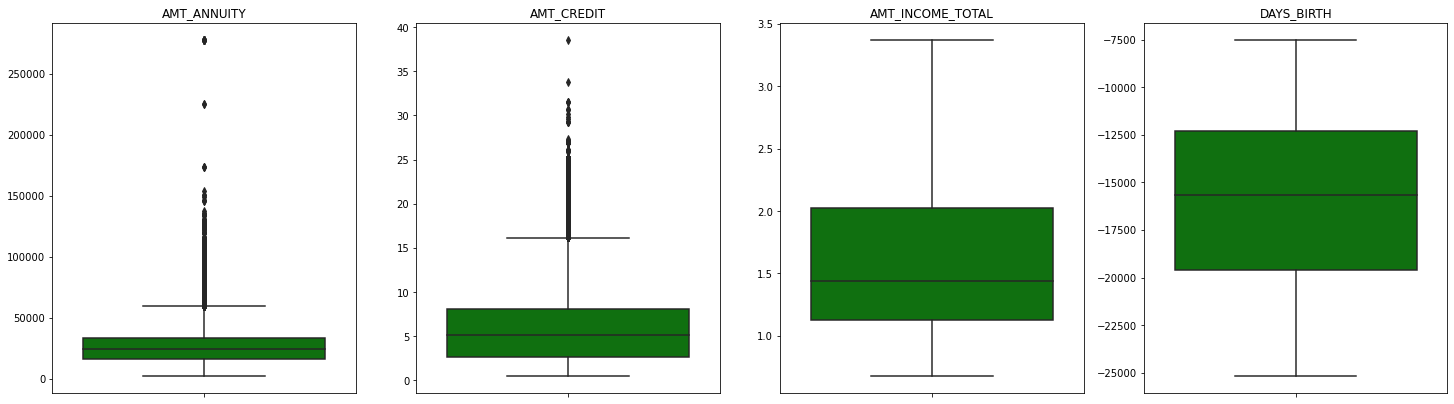

In [84]:
plt.figure(figsize=[25,15])
outliers_columns=['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','DAYS_BIRTH']

for i in enumerate(outliers_columns):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=df_no_outliers3[i[1]],color="green")
    plt.title(i[1])
    plt.ylabel("")
    
#Not bad! Even though there are other human errors and outliers in other variables, I leave them for this analysis.

In [85]:
#3rd question: 

In [86]:
#Some macro information about the data 
#Total amount of loans according to defaulters/repayers
r=df.groupby(df["TARGET"], as_index=False)["AMT_CREDIT"].sum()
r

,TARGET,AMT_CREDIT
0,0,1.703602e+06
1,1,1.384685e+05


In [87]:
#The percentage of defaulters(target=0)in terms of total amount of loans. 
r1 = df.groupby(["TARGET"]).sum()["AMT_CREDIT"]/df["AMT_CREDIT"].sum()
np.round(r1*100)

TARGET
0    92.0
1     8.0
Name: AMT_CREDIT, dtype: float64

Text(0, 0.5, 'Frequency')

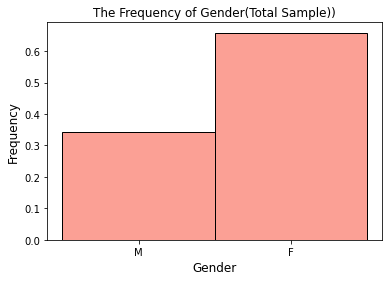

In [88]:
#Frequency of Gender by Total Sample 
g=sns.histplot(x="CODE_GENDER",
            stat="density", data=df, color="salmon")
plt.title('The Frequency of Gender(Total Sample))', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

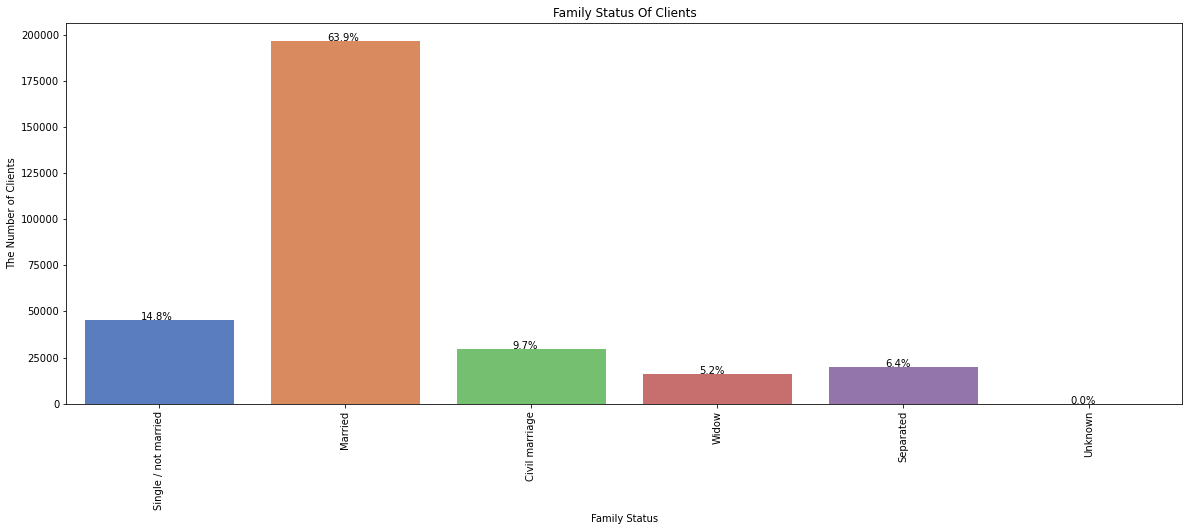

In [89]:
plt.figure(figsize = (20,7))
ax = sns.countplot(x = df.NAME_FAMILY_STATUS ,data=df_t0, palette = "muted")
for value in ax.patches:
    percentage = '{:.1f}%'.format(100*value.get_height()/len(df.NAME_FAMILY_STATUS))
    x = value.get_x()+value.get_width()-0.5
    y = value.get_height()
    ax.annotate(percentage, (x, y))
plt.xticks(rotation=90)
plt.title('Family Status Of Clients')
plt.xlabel('Family Status')
plt.ylabel("The Number of Clients");

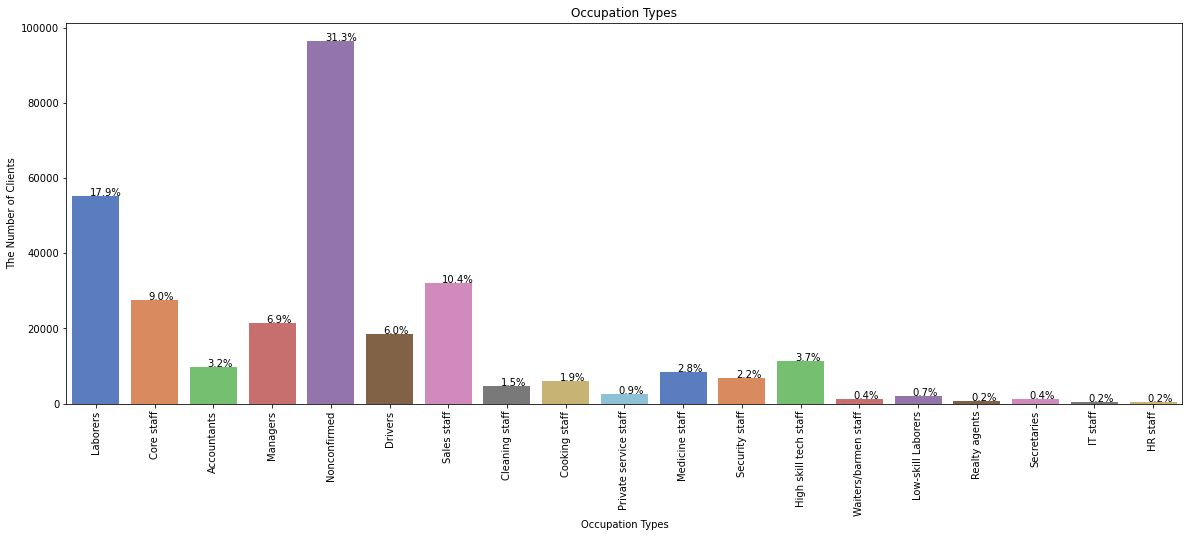

In [90]:
plt.figure(figsize = (20,7))
ax = sns.countplot(x = df.OCCUPATION_TYPE ,data=df, palette = "muted")
for value in ax.patches:
    percentage = '{:.1f}%'.format(100*value.get_height()/len(df.OCCUPATION_TYPE))
    x = value.get_x()+value.get_width()-0.5
    y = value.get_height()
    ax.annotate(percentage, (x, y))
plt.xticks(rotation=90)
plt.title('Occupation Types')
plt.xlabel('Occupation Types')
plt.ylabel("The Number of Clients");

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


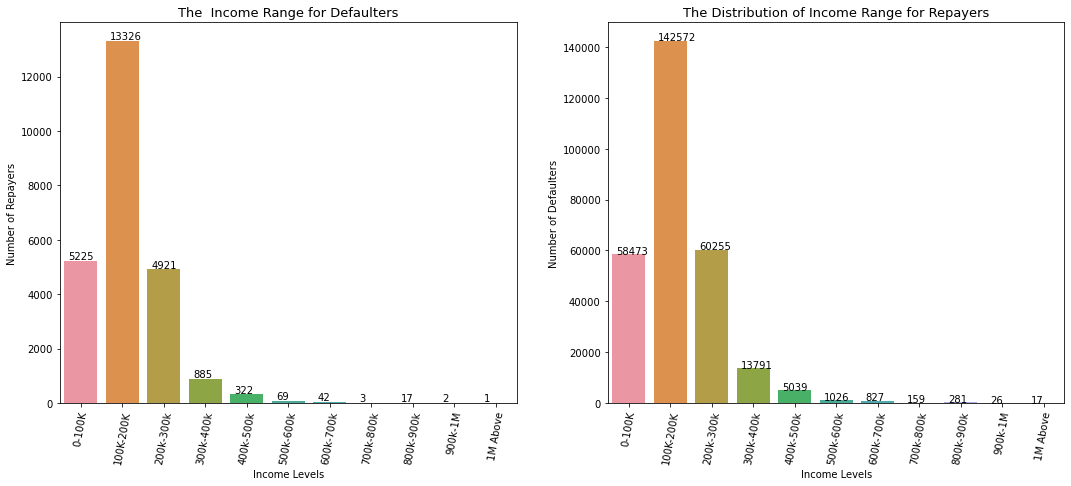

In [91]:
#4th question
df_t1 = df.loc[df.TARGET==1]
df_t0 = df.loc[df.TARGET==0]

plt.figure(figsize=(18,7))
plt.subplot(1, 2, 1)
ax=sns.countplot('INCOME_BIN', data=df_t1)
plt.title('The  '+'%s' % 'Income Range'+' for Defaulters', fontsize=13)
plt.xlabel('Income Levels')
plt.xticks(rotation=80)
plt.ylabel('Number of Repayers')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))


plt.subplot(1, 2, 2)
ax=sns.countplot('INCOME_BIN', data=df_t0)
plt.title('The Distribution of '+'%s' %'Income Range'+' for Repayers', fontsize=13)
plt.xlabel('Income Levels')
plt.xticks(rotation=80)
plt.ylabel('Number of Defaulters')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))
plt.show()

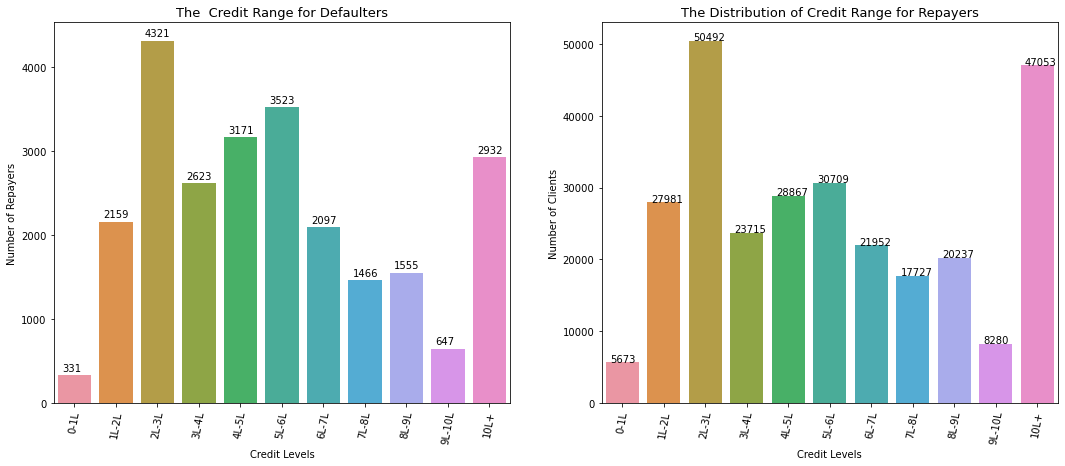

In [92]:
df_t1 = df.loc[df.TARGET==1]
df_t0 = df.loc[df.TARGET==0]

plt.figure(figsize=(18,7))
plt.subplot(1, 2, 1)
ax=sns.countplot('CREDIT_BIN', data=df_t1)
plt.title('The  '+'%s' % 'Credit Range'+' for Defaulters', fontsize=13)
plt.xlabel('Credit Levels')
plt.xticks(rotation=80)
plt.ylabel('Number of Repayers')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))


plt.subplot(1, 2, 2)
ax=sns.countplot('CREDIT_BIN', data=df_t0)
plt.title('The Distribution of '+'%s' %'Credit Range'+' for Repayers', fontsize=13)
plt.xlabel('Credit Levels')
plt.xticks(rotation=80)
plt.ylabel('Number of Clients')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))
plt.show()



Text(0, 0.5, 'Frequency')

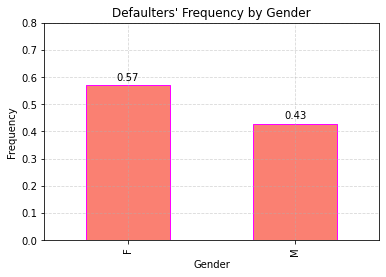

In [93]:
plot = df[df["TARGET"]==1]
ax = (plot.groupby(['CODE_GENDER']).count() / len(plot))['TARGET'].plot.bar(color='salmon', edgecolor='magenta')
rects = ax.patches
labels=[0,1]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+0.01, np.round(height,2), ha="center", va="bottom"
    )
ax.set_ylim(0,0.8)
ax.grid(True, alpha = 0.5, linestyle='--')
ax.set_title("Defaulters' Frequency by Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Frequency")

In [94]:
#5th question: 
df = pd.get_dummies(df)

In [95]:
df = df_no_outliers3

In [96]:
#6th question:
df = pd.get_dummies(df)
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [97]:
X=df

In [98]:
X=X.drop(['TARGET'],axis=1)

In [99]:
y=df['TARGET']

In [100]:
lr=LogisticRegression()

In [101]:
lr.fit(X,y)

LogisticRegression()

In [102]:
lr.score(X,y)

0.9179727340422152

In [103]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=1)

In [104]:
print(lr.fit(X,y))

LogisticRegression()


In [105]:
y_pred=lr.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[52025     0]
 [ 4647     0]]


In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     52025
           1       0.00      0.00      0.00      4647

    accuracy                           0.92     56672
   macro avg       0.46      0.50      0.48     56672
weighted avg       0.84      0.92      0.88     56672



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
